## Running Analysis on the Directional Surveys in British Columbia

**Data:** BC Energy Regulator  
**Analysis:** Shahbaz S Mann

#### Cleanup

In [5]:
import pandas as pd


dir_df = pd.read_csv('../../assets/dir_survey.csv', skiprows=1, low_memory=False)


dir_df = dir_df.rename(columns={
    'UWI': 'uwi',
    'WA NUM': 'wa_num',
    'Drilling Event': 'drilling_event',
    'Measured Depth (m)': 'md_m',
    'Inclination (deg)': 'inclination_deg',
    'Azimuth (deg)': 'azimuth_deg',
    'TV Depth (m)': 'tvd_m',
    'North South (m)': 'north_south_m',
    'East West (m)': 'east_west_m',
})



dir_df.head(5)

,uwi,wa_num,drilling_event,md_m,inclination_deg,azimuth_deg,tvd_m,north_south_m,east_west_m
0,200B091K094B0802,3488,2,0.0,0.00,0.00,NaN,NaN,NaN
1,200B091K094B0802,3488,2,30.0,0.34,190.39,30.00,-0.09,-0.02
2,200B091K094B0802,3488,2,60.0,0.38,175.04,60.00,-0.27,-0.02
3,200B091K094B0802,3488,2,90.0,0.74,229.44,90.00,-0.50,-0.16
4,200B091K094B0802,3488,2,120.0,1.19,239.55,119.99,-0.78,-0.58


#### Let's see what are the usual TVD's  and MD's of these horizontal wells

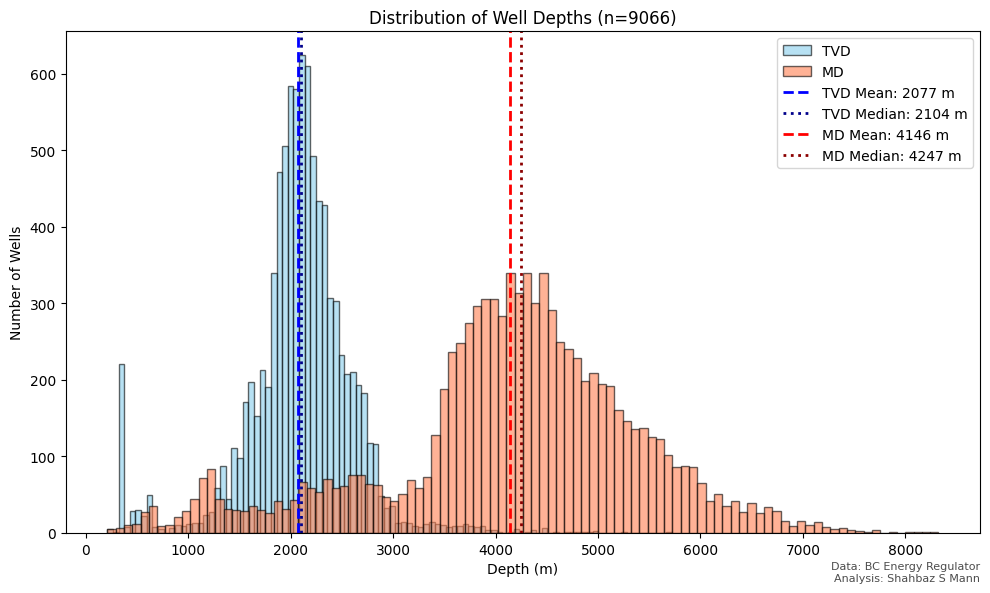

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

depth_cols = ['tvd_m', 'md_m']

well_total_depths = dir_df.groupby('uwi')[depth_cols].max()

mean_tvdepth = well_total_depths['tvd_m'].mean()
median_tvdepth = well_total_depths['tvd_m'].median()

mean_mddepth = well_total_depths['md_m'].mean()
median_mddepth = well_total_depths['md_m'].median()

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(well_total_depths['tvd_m'], bins=100, color='skyblue', edgecolor='black', alpha=0.6, label='TVD')
ax.hist(well_total_depths['md_m'], bins=100, color='coral', edgecolor='black', alpha=0.6, label='MD')

ax.axvline(mean_tvdepth, color='blue', linestyle='dashed', linewidth=2, label=f'TVD Mean: {mean_tvdepth:.0f} m')
ax.axvline(median_tvdepth, color='darkblue', linestyle='dotted', linewidth=2, label=f'TVD Median: {median_tvdepth:.0f} m')

ax.axvline(mean_mddepth, color='red', linestyle='dashed', linewidth=2, label=f'MD Mean: {mean_mddepth:.0f} m')
ax.axvline(median_mddepth, color='darkred', linestyle='dotted', linewidth=2, label=f'MD Median: {median_mddepth:.0f} m')

ax.set_xlabel('Depth (m)')
ax.set_ylabel('Number of Wells')
ax.set_title(f'Distribution of Well Depths (n={len(well_total_depths)})')
ax.legend()

ax.text(1, -0.1, 'Data: BC Energy Regulator\nAnalysis: Shahbaz S Mann', 
        transform=ax.transAxes, fontsize=8, verticalalignment='bottom', 
        horizontalalignment='right', alpha=0.7)

plt.tight_layout()
plt.show()


#### Horizontal Reach Ratio (MD/TVD)
This ratio indicates how much horizontal distance is reached for each unit of vertical depth. Higher ratios indicate more lateral reach.

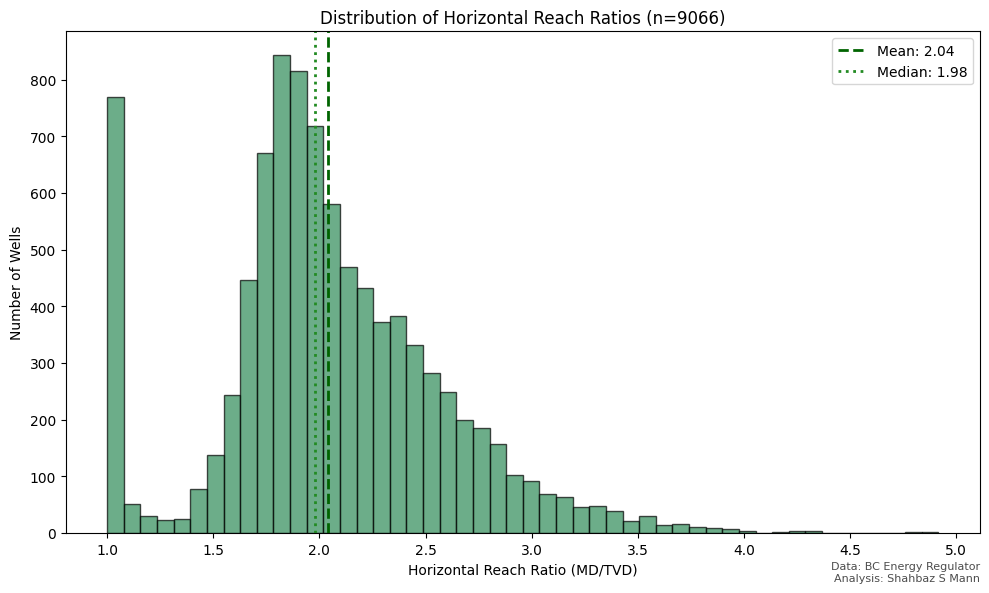

In [7]:

well_total_depths['reach_ratio'] = well_total_depths['md_m'] / well_total_depths['tvd_m']


well_total_depths_clean = well_total_depths[
    (well_total_depths['reach_ratio'] > 0) & 
    (well_total_depths['reach_ratio'] < 10)  
].copy()

mean_ratio = well_total_depths_clean['reach_ratio'].mean()
median_ratio = well_total_depths_clean['reach_ratio'].median()

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(well_total_depths_clean['reach_ratio'], bins=50, color='seagreen', edgecolor='black', alpha=0.7)

ax.axvline(mean_ratio, color='darkgreen', linestyle='dashed', linewidth=2, label=f'Mean: {mean_ratio:.2f}')
ax.axvline(median_ratio, color='forestgreen', linestyle='dotted', linewidth=2, label=f'Median: {median_ratio:.2f}')

ax.set_xlabel('Horizontal Reach Ratio (MD/TVD)')
ax.set_ylabel('Number of Wells')
ax.set_title(f'Distribution of Horizontal Reach Ratios (n={len(well_total_depths_clean)})')
ax.legend()

ax.text(1, -0.1, 'Data: BC Energy Regulator\nAnalysis: Shahbaz S Mann', 
        transform=ax.transAxes, fontsize=8, verticalalignment='bottom', 
        horizontalalignment='right', alpha=0.7)

plt.tight_layout()
plt.show()
